# Linear classification

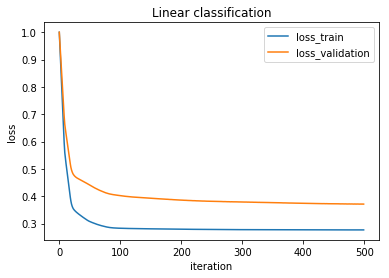

0.276950557196
0.371275831682


In [15]:
#linear classification
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

#read the data
housing_path = './australian_scale.txt'
X, y = load_svmlight_file(housing_path)

#add 1 for each row
X = X.toarray()
row,col=X.shape
X=np.column_stack((X,np.ones(row)))

#divide data into training and validation
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=30)

#initialize by zeros
W = np.zeros(X_train.shape[1])

#define learn rate, itreation, lambdal, loss array, accuracy array
learn_rate = 0.05
iteration = 500
lambdal = 0.01

loss_train = np.zeros(iteration)
loss_validation = np.zeros(iteration)
accuracy = np.zeros(iteration)

#loss function
def get_loss(X, W, y, lambdal, W_0):
    diff = np.ones(y.shape[0]) - y * np.dot(X, W)
    diff[diff < 0] = 0
    loss = np.sum(diff) / X.shape[0] + np.dot(W_0,W_0.T)/2*lambdal
    return loss

#gradient function
def get_gradient(X, W, y, lambdal, W_0):
    diff = np.ones(y.shape[0]) - y * np.dot(X, W)
    y_get = y.copy()
    y_get[diff <= 0] = 0
    G = -np.dot(y_get,X) / X.shape[0] + W_0 * lambdal  
    return G

#accuracy function
def get_accuracy(x, W, y):
    preY = np.dot(X,W)  
    count = np.sum(preY * y >0)  
    Accuracy = count / X.shape[0]  
    return Accuracy


#start iteration
for i in range(iteration):
    W_0 = W.copy()
    W_0[col-1]= 0
    # get loss
    loss_train[i] = get_loss(X_train, W, y_train, lambdal, W_0)
    loss_validation[i] = get_loss(X_validation, W, y_validation, lambdal, W_0)
    
    #get accuracy
    #accuracy[i] = get_accuracy(X_validation, W, y_validation)
    
    #get gradient and update W
    G = get_gradient(X_train, W, y_train, lambdal, W_0)
    W = W - learn_rate * G

#draw the result
plt.plot(loss_train,label="loss_train")  
plt.plot(loss_validation,label="loss_validation")  
plt.legend()  
plt.xlabel("iteration")  
plt.ylabel("loss")  
plt.title("Linear classification")  
plt.show()
print(loss_train[iteration-1])
print(loss_validation[iteration-1])

